In [19]:
from pathlib import Path

tune_dir = Path("../src/models/ray").resolve()
tune_dir.exists()

True

In [20]:
tunelogs = [d for d in tune_dir.iterdir()]
tunelogs.sort()
latest = tunelogs[-1]
latest

PosixPath('/home/azureuser/code/mads-exam-24/src/models/ray/train_2024-07-04_20-09-42')

In [21]:
from ray.tune import ExperimentAnalysis
import ray
ray.shutdown()
ray.init(ignore_reinit_error=True)

#specific_filename = "train_2024-07-01_07-39-36"

analysis = ExperimentAnalysis(latest)
#analysis = ExperimentAnalysis(specific_filename)

2024-07-05 05:10:12,773	INFO worker.py:1753 -- Started a local Ray instance.


In [15]:

analysis.results_df.columns


Index(['iterations', 'train_loss', 'test_loss', 'Accuracy', 'F1scoremicro',
       'F1scoremacro', 'Precisionmicro', 'Recallmacro', 'timestamp',
       'checkpoint_dir_name', 'done', 'training_iteration', 'date',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'iterations_since_restore', 'experiment_tag',
       'config/num_layers', 'config/hidden', 'config/num_classes',
       'config/tune_dir', 'config/data_dir', 'config/dropout', 'config/shape'],
      dtype='object')

In [22]:
import plotly.express as px

plot = analysis.results_df
select = ["Recallmacro", "config/hidden", "config/dropout", "iterations"]
p = plot[select].reset_index().dropna()

In [23]:
p.sort_values("Recallmacro", inplace=True)

In [31]:
px.parallel_coordinates(p, color="Recallmacro")


In [30]:
p[-10:]

,trial_id,Recallmacro,config/hidden,config/dropout,iterations
44,3fa8c00c,0.994218,60,0.022274,4
21,25b15708,0.995220,60,0.009292,8
15,335ecf1f,0.997419,57,0.040203,9
47,171d3462,0.997528,60,0.021318,9
29,444b1f0a,0.997695,60,0.015910,8
40,cee81fa4,0.998042,60,0.019649,9
32,8a9cabe6,0.998360,60,0.018458,9
49,e4017b38,0.998453,60,0.021469,9
43,6f473809,0.998809,60,0.023088,9
48,314cbc19,0.999241,60,0.022277,9


<Axes: xlabel='config/dropout', ylabel='config/hidden'>

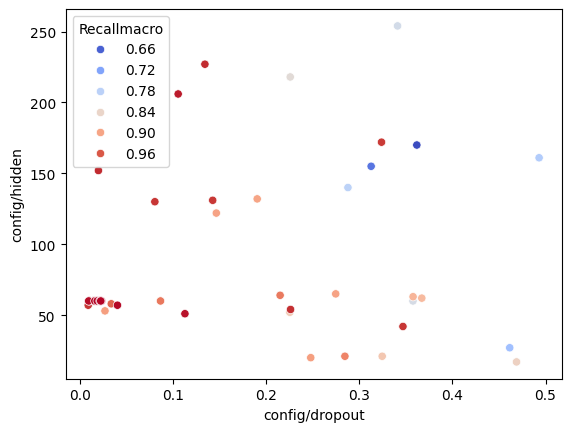

In [35]:
import seaborn as sns

sns.scatterplot(data=p, x="config/dropout", y="config/hidden", hue="Recallmacro", palette="coolwarm")

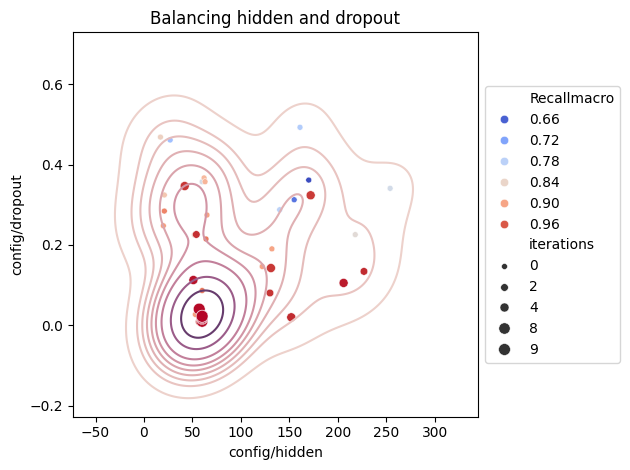

In [39]:
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
sns.scatterplot(data=p, x="config/hidden", y="config/dropout", hue="Recallmacro", palette="coolwarm", size = "iterations")
sns.kdeplot(data=p, x="config/hidden", y="config/dropout", cmap=cmap)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Balancing hidden and dropout")
plt.tight_layout()
plt.savefig('kde_plot_small.png')


In [26]:
analysis.get_best_config(metric="Accuracy", mode="max")

{'num_layers': 1,
 'hidden': 60,
 'num_classes': 2,
 'tune_dir': PosixPath('/home/azureuser/code/mads-exam-24/src/models/ray'),
 'data_dir': PosixPath('/home/azureuser/code/mads-exam-24/data'),
 'dropout': 0.022276798561474936,
 'shape': [16, 12]}